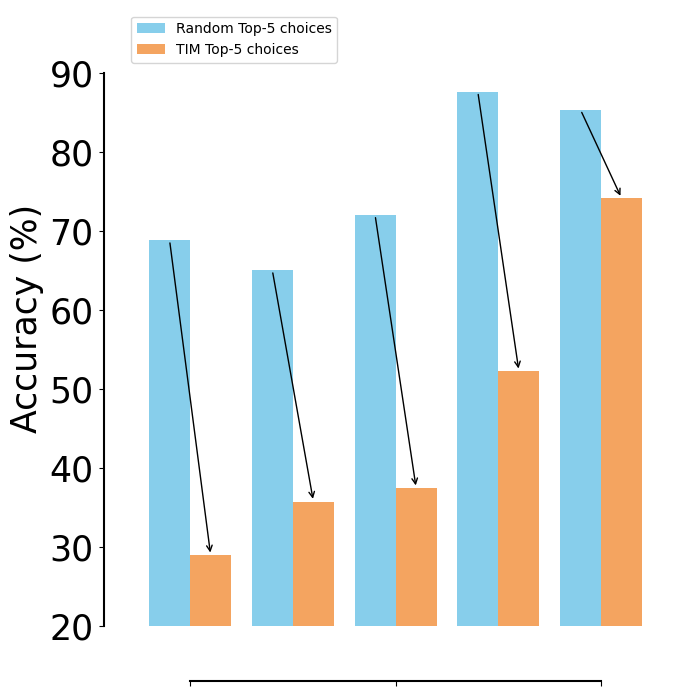

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data from the image
models = [
    "LLaVA-OV-7B", "LLaVA-Video-7B", "GPT-4o-mini", "GPT-4o", "LLaVA-Action-7B"
]

accuracy_random = [68.8, 65.0, 72.0, 87.6, 85.3]
accuracy_tim = [28.9, 35.7, 37.4, 52.2,  74.1]

width = 0.4
x = np.arange(len(models))  # Create uniform x coordinates

# fig, ax = plt.subplots(figsize=(3,8))
fig, ax = plt.subplots(figsize=(7,8), facecolor='none')
ax.set_facecolor('none')  # Set background to transparent

# Bar plots - create all pairs at once
bars1 = ax.bar(x - width/2, accuracy_random, width, label="Random Top-5 choices", color="skyblue")
bars2 = ax.bar(x + width/2, accuracy_tim, width, label="TIM Top-5 choices", color="sandybrown")

# Add connecting lines with arrows
for i in range(len(models)):
    ax.annotate("", xy=(x[i] + width/2, accuracy_tim[i]), xytext=(x[i] - width/2, accuracy_random[i]),
                arrowprops=dict(arrowstyle="->", color="black"))

# Labels and title
ax.set_ylabel("Accuracy (%)", size=25)
ax.set_xticklabels([])

# Set legend at the top left
ax.legend(loc="upper left")

# Customize axis style
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
ax.tick_params(axis="both", which="major", labelsize=25)

# Remove grid lines
ax.grid(False)

# Set y-axis range
ax.set_ylim(20, 98)


sns.despine(
    left=False,
    right=True,
    bottom=False,
    top=True,
    trim=True,
    offset={"bottom": 40, "left": 15},
)

plt.savefig("plot_fingure1.svg", dpi=300, bbox_inches = "tight", transparent = True)


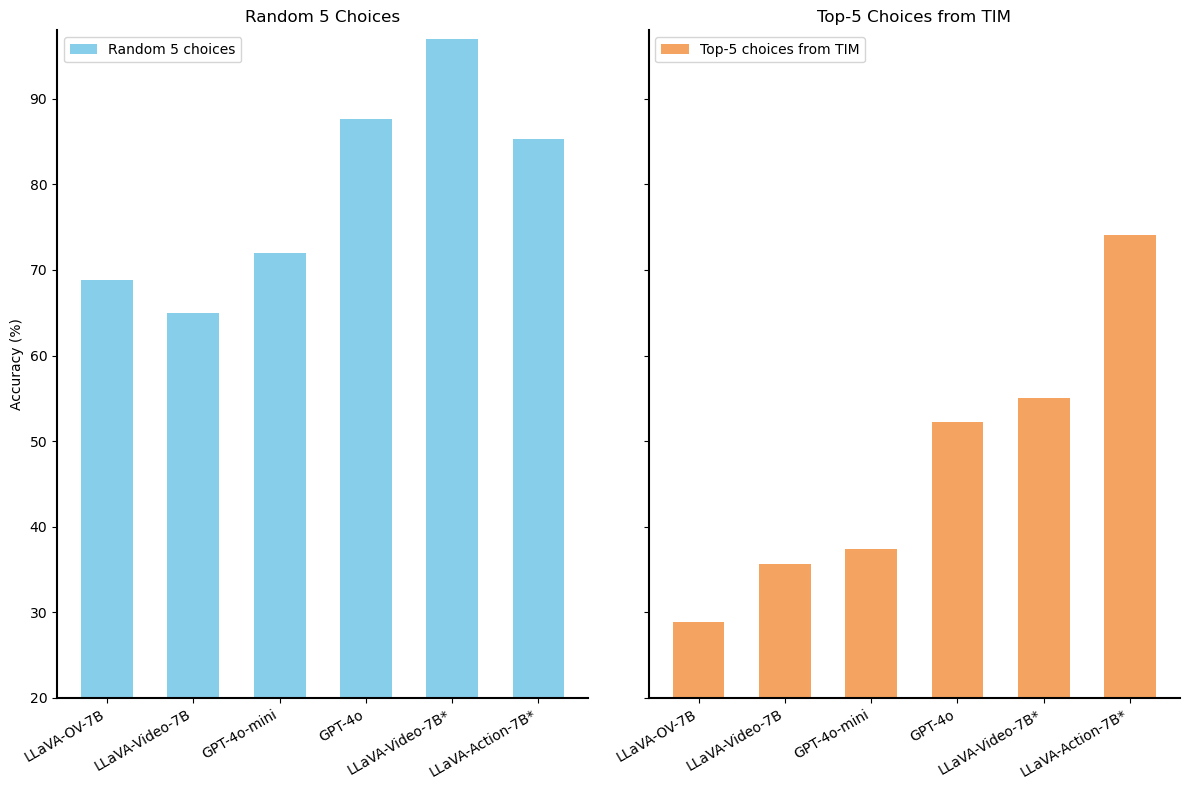

In [11]:
# Data from the image
models = [
    "LLaVA-OV-7B", "LLaVA-Video-7B", "GPT-4o-mini", "GPT-4o", 
    "LLaVA-Video-7B*", "LLaVA-Action-7B*"
]

accuracy_random = [68.8, 65.0, 72.0, 87.6, 97.0, 85.3]
accuracy_tim = [28.9, 35.7, 37.4, 52.2, 55.0, 74.1]

# Create figure with two subplots sharing y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8), facecolor='none', sharey=True)
for ax in [ax1, ax2]:
    ax.set_facecolor('none')

# Create x coordinates
x = np.arange(len(models))
width = 0.6  # Wider bars since we have more space now

# Left plot - Random choices
bars1 = ax1.bar(x, accuracy_random, width, color="skyblue", label="Random 5 choices")
ax1.set_title("Random 5 Choices")

# Right plot - TIM choices
bars2 = ax2.bar(x, accuracy_tim, width, color="sandybrown", label="Top-5 choices from TIM")
ax2.set_title("Top-5 Choices from TIM")

# Common styling for both plots
for ax in [ax1, ax2]:
    # Customize axis style
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    
    # Remove grid lines
    ax.grid(False)
    
    # Set x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=30, ha="right")
    
    # Add legend
    ax.legend(loc="upper left")

# Set y-axis label only for left plot
ax1.set_ylabel("Accuracy (%)")

# Set y-axis range
ax1.set_ylim(20, 98)

# Adjust layout to prevent label overlap
plt.tight_layout()

plt.savefig("split_plot.png", dpi=300, bbox_inches='tight') 